# WiDS DATATHON WORKSHOP
## FEBRUARY 21, 2019
<img src="images/inst_logos.png" alt="Harvard IACS" style="height: 80px;" align="left"/>

### INSTRUCTORS: 
- **Anastasiya Belyaeva (MIT)**
- **Weiwei Pan (Harvard IACS)**

### SET-UP INSTRUCTIONS:
* WiFi access code: **msevent228cv**
* The slides for this workshop are at https://github.com/anastasiyabel/wids_2019

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd # package for data analysis, reading in the data, summarizing data, manipulating data
import numpy as np # package for math operations
import matplotlib.pyplot as plt # package for plotting
from IPython.display import Image
from sklearn import preprocessing, neighbors, metrics, model_selection, linear_model, ensemble, svm, tree

In [26]:
rand_state = 2
test_size = 0.3

# set random seed
np.random.seed(rand_state)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='blue')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='red', alpha=0.3)
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Blues')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    return ax

# function to generate some toy data for classification
def generate_toy_data(rand_state):
    data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
    data = np.hstack((data, np.zeros((200, 1))))
    data[data[:, 0]**2 + data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], 
                                                                     len(data[data[:, 0]**2 + data[:, 1]**2 < 3**2]), 
                                                                     p=[0.2, 0.8])
    X = data[:, :-1]
    y = data[:, -1]
    
    return X, y
    # train test split
    #return model_selection.train_test_split(X, y, test_size=test_size, random_state=rand_state)

# WHAT IS MACHINE LEARNING?

* Automated learning of rules and patterns from data
* Some goals: 
    * Prediction - given new data, what will be the output
    * Intepretability - understand how output varies with input

# Supervised vs. Unsupervised Machine Learning
* Supervised: learn mapping from inputs $X$ to outputs $y$ given **labeled set of input-output pairs**
    * Classification (is this email spam or not)
    * Regression (prediction of price of goods)


* Unsupervised: find some structure in the data using just **inputs** $X$
    * Clustering
    * Dimensionality reduction

<img src="images/supervised_vs_unsupervised.png" alt="" style="height: 200px;" align="center"/>

# Supervised Machine Learning: Clasification vs. Regression
* Goal: using observed data, i.e. set of predictors/features $[x_1, \ldots, x_D] \in \mathbb{R}^D$, predict the response variable $y$
* Regression - response $y$ is continuous
* Classification - response $y$ is categorical
<img src="images/classification_vs_regression.png" alt="" style="height: 300px;" align="center"/>

# How does supervised machine learning work?
* We have a set of observations, called **training data** $\{(\mathbf{x}_1, y_1),\ldots, (\mathbf{x}_N, y_N)\}$
* $\mathbf{x}_n$ is the observed values of the $D$-number of predictors $\mathbf{x}_n = [x_1, \ldots, x_D]$
* We have a 'function' in mind that explains how the response depends on the predictors $f(x_1, \ldots, x_D) \rightarrow y$
* This function has some constants/coefficients we need to set, these are called ***parameters***
$$
f(x_1, \ldots, x_D) = w_1\sin(x_1) + \ldots + w_D \sin(x_D)
$$
* **Fitting/training** the model means learning these parameters to best explain the observed data
* Make predictions once the model is trained
* **Evaluating** the model means making predictions $\widehat{y}$ and comparing them to the true response $y$
* Accuracy - the percentage of points correctly labeled by our model

<img src="images/training1.png" alt="" style="height: 200px;" align="center"/>

# Models for Classification
* Logistic Regression
    * Linear decision boundary
    * Non-linear decision boundary
* Decision Trees
* Neural Networks
* Ensemble Methods

# Logistic Regression
* Let's start with data that has just two predictors $x_1$ and $x_2$ and two classes $y \in \{0, 1\}$
* Separate the classes by a curve (or surface) such that as many points as possible are classified correctly
* The curve/surface is known as **decision boundary**
* Model the probability of a data point belonging to a particular class
* The further the point is away from the decision boundary, the probability of that point belonging to a certain class is higher
<img src="images/decision_boundary000.png" alt="" style="height: 300px;" align="center"/>

# Logistic Regression : Linear Decision Boundary
* Assume that the decision boundary is linear
\begin{equation}
\mathbf{w}^\top\mathbf{x} = w_0 x_0 + w_1 x_1 + \ldots + w_D x_D = 0
\end{equation}
where $x_0 = 1$ 
* Convert the distance from decision boundary into probability of belonging to a certain class (number between 0 and 1)


* Logistic/sigmoid function takes a number in range $(-\inf, \inf)$ and maps it to a number in $(0, 1)$
$$
\text{Prob}[y = 1 | \mathbf{x}] = \text{logistic}(\mathbf{w}^\top\mathbf{x})
$$
If $\text{Prob}[y = 1 | \mathbf{x}] \geq 0.5$ we label $\mathbf{x}$ class 1, otherwise we label it class 0.
* To fit our model, we need to learn the parameters of $\mathbf{w}$ that maximizes the likelihood of our training data
<img src="images/decision_boundary3.png" alt="" style="height: 200px;" align="center"/>

In [164]:
# read training toy data set
linear_toy_data= pd.read_csv('toy_data_train.txt', delimiter=',')
X_train = linear_toy_data.values[:, :-1]
y_train = linear_toy_data.values[:, -1]
# read testing toy data set
linear_toy_data = pd.read_csv('toy_data_test.txt', delimiter=',')
X_test = linear_toy_data.values[:, :-1]
y_test = linear_toy_data.values[:, -1]

In [165]:
# create a logistic regression model with linear boundary
logreg = linear_model.LogisticRegression(C=1.)
# fit our logistic regression model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Plotting the learned decision boundary

In [166]:
def plot_logisitc_reg_lin(X_train, y_train):
    # plot data and decision boundary of logistic regression
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # plot class 1
    ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', label='Class 1')
    # plot class 0
    ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', label='Class 0', alpha=0.3)
    # label axes
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    # label title
    ax[0].set_title('Training Toy Data Set for Binary Classification')
    # add legend
    ax[0].legend()

    # plot decision boundary
    ax[1] = plot_decision_boundary(X_train, y_train, logreg, 
                                   'Logistic Regression (linear boundary)', 
                                   ax[1])

    plt.tight_layout()
    plt.show()

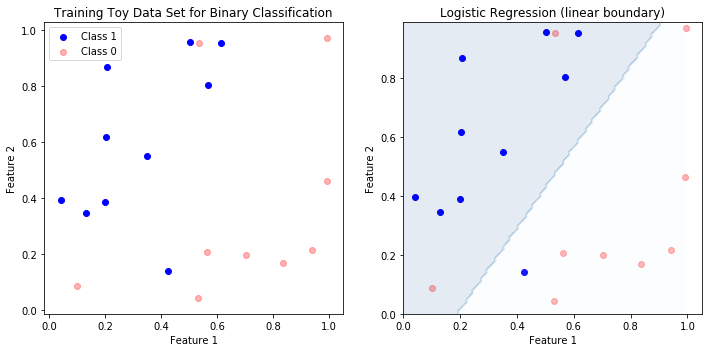

In [167]:
plot_logisitc_reg_lin(X_train, y_train)

# Logistic Regression : Non-linear Decision Boundary
* What if our data is more complex and the two classes cannot be separated by a line

In [174]:
def generate_and_plot_complex_data(rand_state):
    # generate more complicated toy data
    X, y = generate_toy_data(rand_state)
    # plot data and decision boundary of logistic regression
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    # plot class 1
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
    # plot class 0
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0', alpha=0.3)
    # label axes
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    # label title
    ax.set_title('Training Toy Data Set for Binary Classification')
    # add legend
    ax.legend()
    # add x, y limits
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])

    plt.tight_layout()
    plt.show()
    return X, y

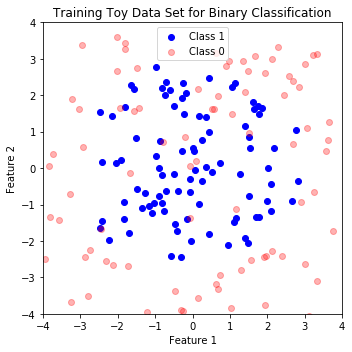

In [175]:
X, y = generate_and_plot_complex_data(rand_state)

# Logistic Regression with Quadratic Decision Boundary
A simple non-linear boundary is a quadratic decision boundary. It is defined by the equation
$$
\mathbf{w}^\top \mathbf{x}_{\text{poly}} = w_0 + w_{11}x_1 + w_{12}x^2_1 + \ldots + w_{D1}x_D + w_{D2} x^2_D = 0
$$
where $\mathbf{x}_{\text{poly}} = [1, x_1, x^2_1, \ldots, x_D, x^2_D]$.

What the above is saying is that a quadratic equation in $\mathbf{x}$ is **secretly a linear equation** in the transformed vector $\mathbf{x}_{\text{poly}}$.

Computing p-powers of the features:
$$
\begin{aligned}
\mathbb{R}^D &\to \mathbb{R}^{D\cdot p}\\
[x_1, \ldots, x_D] &\rightarrow [x_1, x^2_1\ldots, x^p_1, \ldots, x_D, x^2_D\ldots, x^p_D]
\end{aligned}
$$

In [182]:
# create polynomial features
quad_features = preprocessing.PolynomialFeatures(degree=2)
X_quad = quad_features.fit_transform(X)
# fit our logistic regression model with non-linear decision boundary
logreg.fit(X_quad, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Plotting the learned decision boundary

In [183]:
def logisitc_reg_complex(X, y, logreg):
    # plot data and decision boundary of logistic regression
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # plot class 1
    ax[0].scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
    # plot class 0
    ax[0].scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0', alpha=0.3)
    # label axes
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    # label title
    ax[0].set_title('Training Toy Data Set for Binary Classification')
    # add legend
    ax[0].legend()
    # set x, y limits
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])

    # plot decision boundary
    ax[1] = plot_decision_boundary(X, y, logreg, 
                                   'Logistic Regression (quadratic boundary)', 
                                   ax[1], bounds=(-6, 7), poly_flag=True)
    # set x, y limits
    ax[1].set_xlim([-4, 4])
    ax[1].set_ylim([-4, 4])

    plt.tight_layout()
    plt.show()

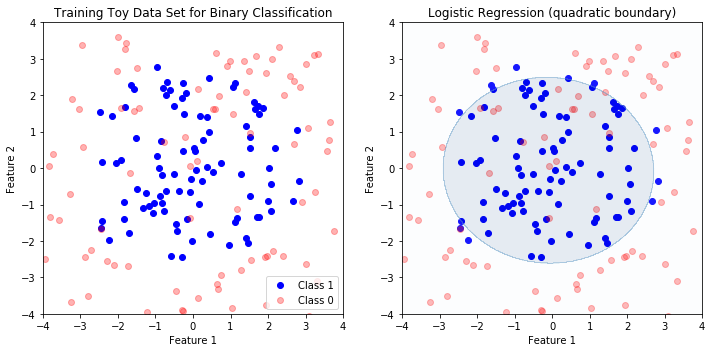

In [184]:
logisitc_reg_complex(X, y, logreg)

# Decision Trees

Logistic regression models with linear boundaries are intuitive to interpret. We often examine the impact of each predictor on the log-odds of a positive classification:
$$
12 x_1 - 0.4 x_2 + -20x_3 = 0.
$$


But it is less straightforward to interpret nonlinear decision boundaries in the problem context:
$$
(x_3 + 2 x_2)^2 - x_1 + 10 = 0.
$$

It would be desirable to build models with complex decision boundaries that are also easy to interpret.

But people in every walk of life have long been using ***decision trees*** (flow charts) for differentiating between classes of objects and phenomena:
<img src="images/dt_partition.png" alt="" style="height: 300px;"/>
Every flow chart tree corresponds to a partition of the input space by axis aligned lines or (hyper) planes.

Conversely, every such partition can be written as a flow chart tree.

# Fitting a decision tree on training data:
1. Start with an empty decision tree (undivided feature space)
2. Choose the 'optimal' predictor on which to split and choose the 'optimal' threshold value for splitting
3. Recurse on on each new node until some stopping condition is met

* Typically, we measure optimality by the purity (in terms of observed clases) of each region defined by the tree
* We usually stop until a pre-defined maximum depth is reached


* **Need to choose hyperparameters**
    * stopping condition (usually the max depth, but can also be minimum number of observations per region defined by tree)
    * splitting condition (what criteria of purity, in terms of observed classes, used to determine an 'optimal' split)

In [185]:
# create a decision tree model
tree_model = tree.DecisionTreeClassifier(max_depth=3)
# fit decision tree model
tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
def plot_tree(X, y, tree_model):
    # plot data and decision boundary of logistic regression
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # plot class 1
    ax[0].scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
    # plot class 0
    ax[0].scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 0', alpha=0.3)
    # label axes
    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    # label title
    ax[0].set_title('Training Toy Data Set for Binary Classification')
    # add legend
    ax[0].legend()
    # set x, y limits
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])

    # plot decision boundary
    ax[1] = plot_decision_boundary(X, y, tree_model, 
                                   'Decision Tree (depth = 3)', 
                                   ax[1], bounds=(-6, 7), poly_flag=False)
    # set x, y limits
    ax[1].set_xlim([-4, 4])
    ax[1].set_ylim([-4, 4])

    plt.tight_layout()
    plt.show()

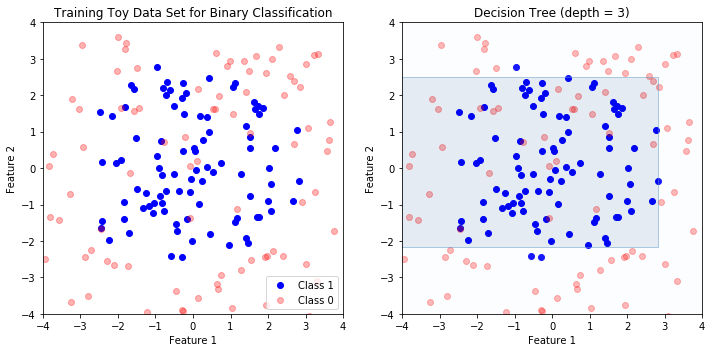

In [187]:
plot_tree(X, y, tree_model)

# Deep vs. Shallow Trees
* The deeper the tree, the more splits it has and it captures more information about the training data
* But deeper trees can also result in very unnatural decision boundaries that are particular to our training data but not to unseen data

In [188]:
def shallow_vs_deep(X, y):
    depths = [3, 4, 10, 20]
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax = ax.flatten()
    for i, depth in enumerate(depths):
        # create a decision tree model
        tree_model = tree.DecisionTreeClassifier(max_depth=depth)
        # fit decision tree model
        tree_model.fit(X, y)
        # plot decision boundary
        ax[i] = plot_decision_boundary(X, y, tree_model, 
                                       'Decision Tree (depth = ' + str(depth) + ')', 
                                       ax[i], bounds=(-6, 7), poly_flag=False)
        # set x, y limits
        ax[i].set_xlim([-4, 4])
        ax[i].set_ylim([-4, 4])

    plt.tight_layout()
    plt.show()

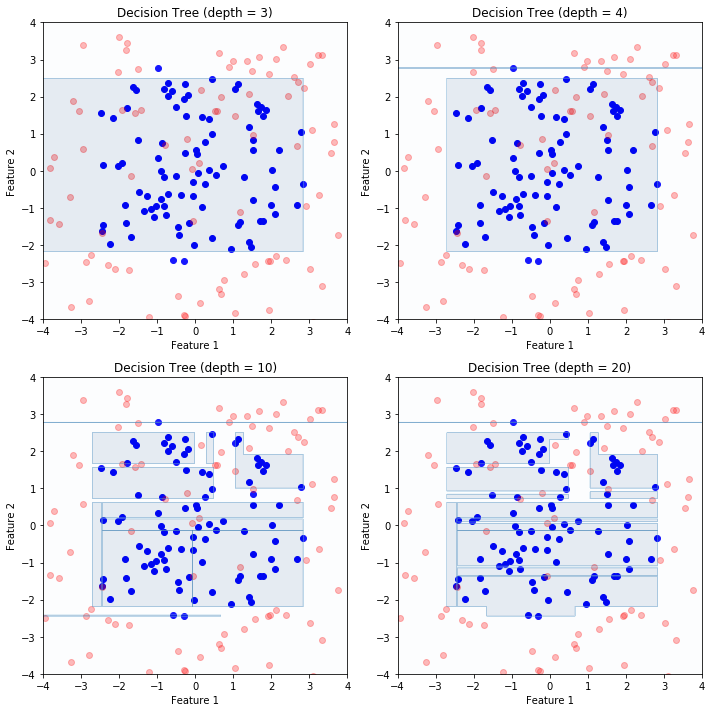

In [189]:
shallow_vs_deep(X, y)

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated
* This problem is mitigated by using decision trees within an ensemble

# MODEL EVALUATION
* How well is my model doing
* Over-fitting
* Choosing hyperparameters

# Training, Validation and Test Sets
* Training set - used to fit the model (e.g. find coefficients)
* Validation set - our model may have different hyperparameters (e.g. tree depth), use this set to pick the best hyperparameters
* Test set - used to evaluate the final model fit on the training set (with chosen hyperparameters)
* Never train on test data
<img src="images/train_valid_test1.png" alt="" style="height: 40px;" align="center"/>

In [103]:
# split the data into training, validation and test sets by specifying a fraction of data 
test_size = 0.2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=rand_state)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=test_size, random_state=rand_state)

# Metrics
* Accuracy
* Area under ROC curve (AUC)

# Receiver operating characteristic (ROC) curve
* Diagnostic ability of classifier
* Plots true positive rate (TPR) against the false positive rate (FPR) at various threshold settings
$$TPR = \frac{TP}{TP + FN}$$
$$FPR = \frac{FP}{FP + TN}$$
* Area under the ROC curve (AUC) - single number which reflects model's performance 
<img src="images/roc_thresholds.png" alt="" style="height: 300px;" align="center"/>

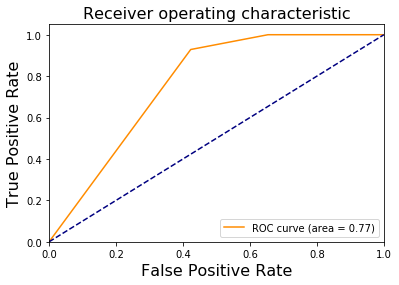

In [109]:
# create a decision tree model
tree_model = tree.DecisionTreeClassifier(max_depth=3)
# fit decision tree model to the training data
tree_model.fit(X_train, y_train)
# obtain the learned decision function and evaluate it on the held-out data
y_pred_scores = tree_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_scores) # obtain false positive and true positive rates
area_under_curve = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % area_under_curve) # plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver operating characteristic', fontsize=16)
plt.legend(loc="lower right")

# Compare training and test accuracy

In [111]:
# calculate the accuracy of the model on test data
# evaluate model
scores_df = pd.DataFrame(data={'Decision tree (depth = 3)': [tree_model.score(X_train, y_train), tree_model.score(X_test, y_test)]}, 
                         index=['Training Accuracy', 'Test Accuracy'])
scores_df.head()

,Decision tree (depth = 3)
Training Accuracy,0.828125
Test Accuracy,0.700000


# Over-fitting and trade-off between model complexity
* Over-fitting: model that corresponds too closely or exactly to the training data
* As a result model doesn't generalize well to additional data or predict future observations reliably

<img src="images/underfit_overfit2.png" alt="" style="height: 200px;" align="center"/>

# Choosing hyperparameters
* Use validation set to evaluate the model for different hyperparameters
* Choose the best hyperparameters

In [151]:
hyperparameters = [3, 4, 5, 6, 7]
auc_list = []
for hyperparam in hyperparameters:
    # create a decision tree model
    tree_model = tree.DecisionTreeClassifier(max_depth=hyperparam, random_state=rand_state)
    # fit decision tree model to the training data
    tree_model.fit(X_train, y_train)
    # obtain the learned decision function and evaluate it on the held-out data
    y_pred_scores = tree_model.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_scores) # obtain false positive and true positive rates
    area_under_curve = metrics.auc(fpr, tpr)
    auc_list.append(area_under_curve)

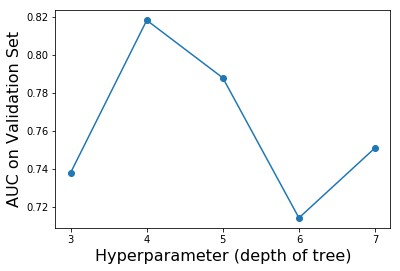

In [157]:
# plot AUC for different hyperparameter values
plt.plot(hyperparameters, auc_list, '-o')
plt.xlabel('Hyperparameter (depth of tree)', fontsize=16)
plt.ylabel('AUC on Validation Set', fontsize=16)
# change x axis tick labels
plt.xticks(hyperparameters)
plt.show()

Test the model with chosen hyperparameter (depth = 4) on unseen test data to evalute the final model

In [159]:
# create a decision tree model
tree_model = tree.DecisionTreeClassifier(max_depth=4)
# fit decision tree model to the training data
tree_model.fit(X_train, y_train)
# obtain the learned decision function and evaluate it on the held-out data
y_pred_scores = tree_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_scores) # obtain false positive and true positive rates
area_under_curve = metrics.auc(fpr, tpr)
print('AUC on test set = {0:.2f}'.format(area_under_curve))

AUC on test set = 0.77
